<a href="https://colab.research.google.com/github/ssprasad-cyber/diabetics_prediction/blob/main/diabetics_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETIC Prediction machine learning model**

libraries using:
- numpy
- pandas
- sklearn
- matplotlib

In [ ]:
!pip install numpy
!pip install sklearn
!pip install pandas
!pip install matplotlib

In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [177]:
import matplotlib.pyplot as plt



importing dataset

In [91]:
dataset = pd.read_csv('/content/diabetes.csv')

In [107]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


DATASET information

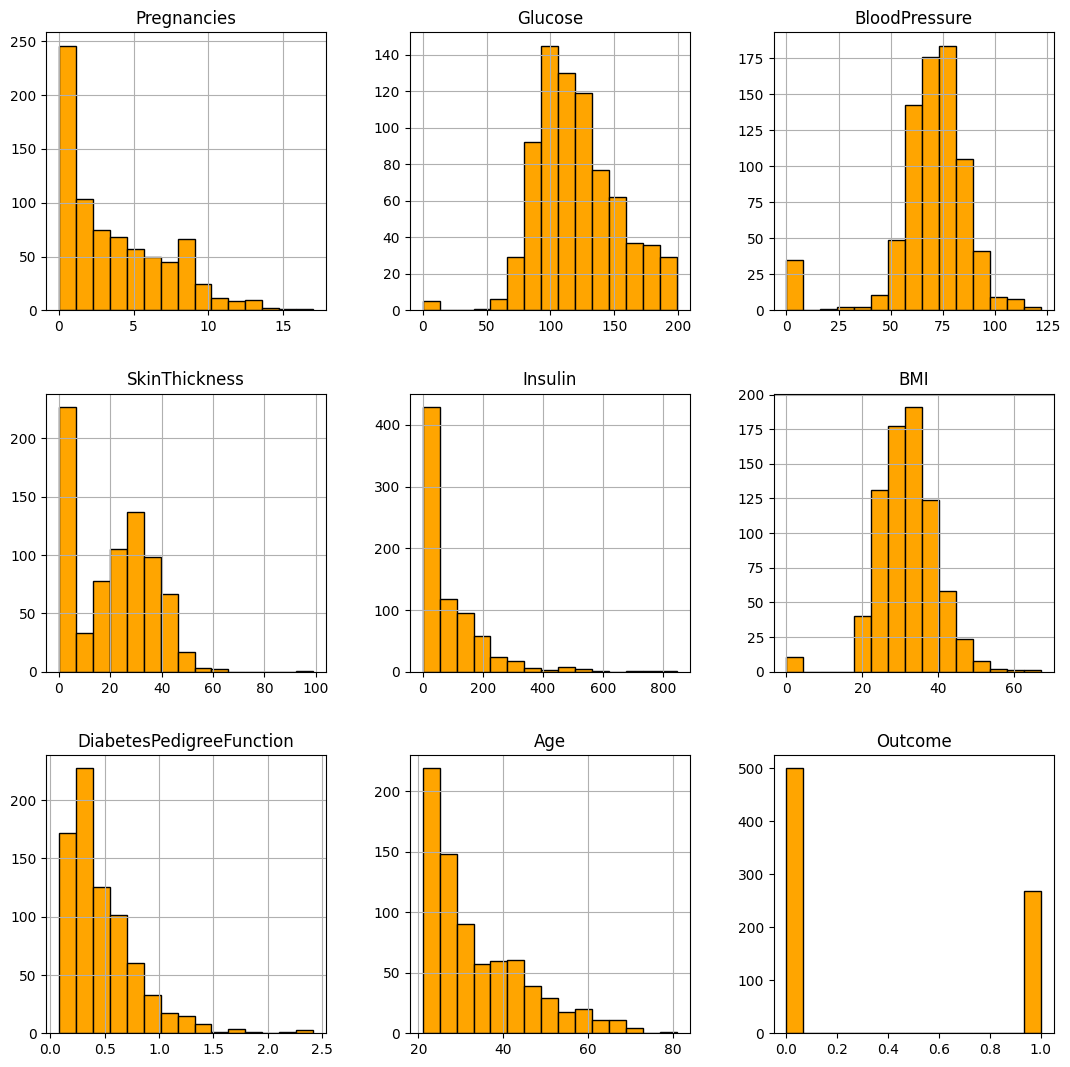

In [198]:
dataset.hist(figsize=(13,13),bins=15, color='orange', edgecolor='black')
plt.grid(False)
plt.show()

In [93]:
dataset.shape

(768, 9)

In [208]:
dd = dataset.describe()
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: title={'center': 'Descprition'}>

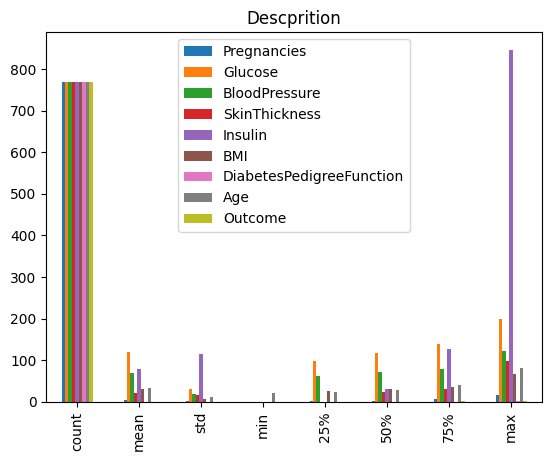

In [231]:
dd.plot(kind='bar',title = "Descprition")

In [232]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [95]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


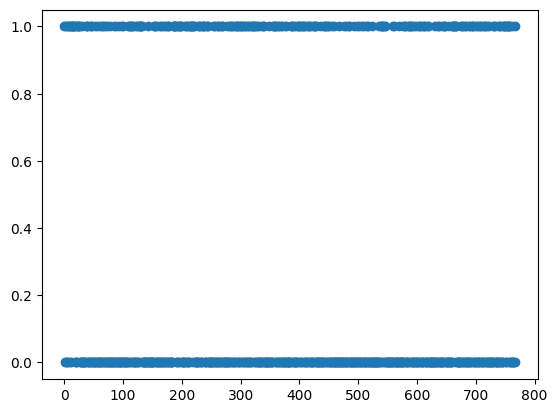

In [127]:
x = dataset.drop(columns = 'Outcome',axis = 1)
y = dataset['Outcome']
print(x,y)
plt.scatter(y.index,y)
plt.show()

Data Standardization

In [98]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [116]:
print(x)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Splitting train data and test data


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state = 1)

In [101]:
print(x_train.shape,x_test.shape)

(614, 8) (154, 8)


**training the modle**

In [102]:
classifier = svm.SVC(kernel='linear')

In [103]:
#training the support vector Machine Classifier
classifier.fit(x_train,y_train)

SVC(kernel='linear')

**MODEL EVALUTION**

Accuracy score


In [250]:
#training accuracy score
x_train_predict = classifier.predict(x_train)
x_train_accuracy = accuracy_score(x_train_predict,y_train)
print("training accuracy score: ",x_train_accuracy)


training accuracy score:  0.7833876221498371


In [105]:
#training accuracy score
x_test_predict = classifier.predict(x_test)
x_test_accuracy = accuracy_score(x_test_predict,y_test)
print("training accuracy score: ",x_test_accuracy)

training accuracy score:  0.7792207792207793


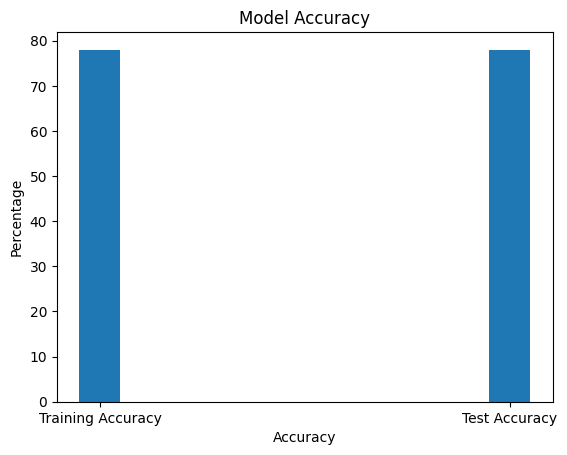

In [271]:
accuracy_value = np.array(x_train_accuracy*100,x_test_accuracy*100)
plt.bar(['Training Accuracy', 'Test Accuracy'], accuracy_values)
plt.xlabel('Accuracy')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.show()

**Making a prediction MACHINE**

In [272]:
input_data = (6,148,72,35,0,33.6,0.627,50)

#converting input data int np array
input_data = np.asarray(input_data)
# reshaping the input data as we are predicting a single data
input_data_r = input_data.reshape(1,-1)
#standarding the input data
std_data = scaler.fit_transform(input_data_r)

prediction = classifier.predict(std_data)
# print(prediction)
if prediction[0]==0:
  print("the person has no diabetics\n\n")
else:
  print("the person has  diabetics\n\n")

the person has no diabetics


